In [36]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. Data Preparation

In [37]:
iris = load_iris()

In [38]:
x = iris.data[:50, 0] 
y = iris.data[:50, 1]  

In [60]:
print("x :", x)
print()
print("y :",y)

x : [5.1 4.9 4.7 4.6 5.  5.4 4.6 5.  4.4 4.9 5.4 4.8 4.8 4.3 5.8 5.7 5.4 5.1
 5.7 5.1 5.4 5.1 4.6 5.1 4.8 5.  5.  5.2 5.2 4.7 4.8 5.4 5.2 5.5 4.9 5.
 5.5 4.9 4.4 5.1 5.  4.5 4.4 5.  5.1 4.8 5.1 4.6 5.3 5. ]

y : [3.5 3.  3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 3.7 3.4 3.  3.  4.  4.4 3.9 3.5
 3.8 3.8 3.4 3.7 3.6 3.3 3.4 3.  3.4 3.5 3.4 3.2 3.1 3.4 4.1 4.2 3.1 3.2
 3.5 3.6 3.  3.4 3.5 2.3 3.2 3.5 3.8 3.  3.8 3.2 3.7 3.3]


In [40]:
print(y)

[3.5 3.  3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 3.7 3.4 3.  3.  4.  4.4 3.9 3.5
 3.8 3.8 3.4 3.7 3.6 3.3 3.4 3.  3.4 3.5 3.4 3.2 3.1 3.4 4.1 4.2 3.1 3.2
 3.5 3.6 3.  3.4 3.5 2.3 3.2 3.5 3.8 3.  3.8 3.2 3.7 3.3]


In [41]:
df = pd.DataFrame({'x': x, 'y': y})
print("\nFirst few rows of our data:")
print(df.head())
print(f"\nData shape: {df.shape[0]} samples, {df.shape[1]} features")


First few rows of our data:
     x    y
0  5.1  3.5
1  4.9  3.0
2  4.7  3.2
3  4.6  3.1
4  5.0  3.6

Data shape: 50 samples, 2 features


## 2. Data Visualization

The scatter plot below shows how Sepal Length and Sepal Width are related. Our goal is to find a straight line that best fits this data.

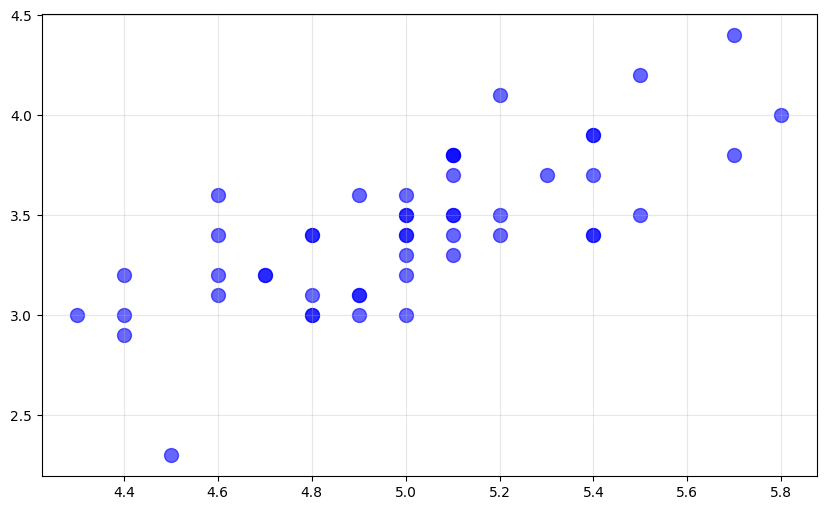

In [42]:
plt.figure(figsize=(10, 6))
plt.scatter(df['x'], df['y'], color='blue', s=100, alpha=0.6, label='Data points')
plt.grid(True, alpha=0.3)
plt.show()


## 3. Linear Regression: Finding the Best Fit Line
### Method 1: Normal Equation (Exact Solution)

In [43]:
X = np.column_stack([np.ones(len(x)), x])

print("Design Matrix X (first 5 rows):")
print(X[:5])
print(f"Shape of X: {X.shape}")  

Design Matrix X (first 5 rows):
[[1.  5.1]
 [1.  4.9]
 [1.  4.7]
 [1.  4.6]
 [1.  5. ]]
Shape of X: (50, 2)


In [65]:
coef_normal = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
b0 = coef_normal[0]
b1 = coef_normal[1]

print("NORMAL EQUATION METHOD")
print(f"Intercept (b₀): {b0:.6f}")
print(f"Slope (b₁): {b1:.6f}")
print(f"Equation: y = {coef_normal[0]:.4f} + {coef_normal[1]:.4f}*x")

NORMAL EQUATION METHOD
Intercept (b₀): -0.569433
Slope (b₁): 0.798528
Equation: y = -0.5694 + 0.7985*x


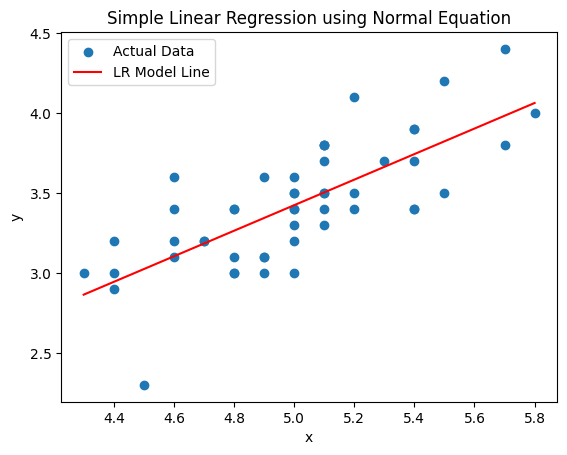

In [45]:
plt.scatter(x, y, label="Actual Data")
x_line = np.linspace(x.min(), x.max(), 100)
y_line = b0 + b1 * x_line

plt.plot(x_line, y_line, color='red', label="LR Model Line")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Simple Linear Regression using Normal Equation")
plt.legend()
plt.show()


### Method 2: Gradient Descent (Iterative Approach)


In [50]:
def gradient_descent(x, y, learning_rate=0.001, epochs=10000):
    
    m = 0.0  
    b = 0.0  
    n = len(x)
    
    for epoch in range(epochs):
        y_pred = m * x + b
        dm = (-2/n) * np.sum(x * (y - y_pred))
        db = (-2/n) * np.sum(y - y_pred)
        
        m -= learning_rate * dm
        b -= learning_rate * db
    
    return b, m

coef_gd = gradient_descent(x, y, learning_rate=0.001, epochs=10000)

print("GRADIENT DESCENT METHOD")
print(f"Intercept (b₀): {coef_gd[0]:.6f}")
print(f"Slope (b₁): {coef_gd[1]:.6f}")
print(f"Equation: y = {coef_gd[0]:.4f} + {coef_gd[1]:.4f}*x")

GRADIENT DESCENT METHOD
Intercept (b₀): 0.068849
Slope (b₁): 0.671618
Equation: y = 0.0688 + 0.6716*x


### Method 3: Covariance Method (Statistical Approach)

- Slope = Covariance(x,y) / Variance(x)
- Intercept = Mean(y) - Slope * Mean(x)

In [54]:
cov_xy = np.cov(x, y, ddof=0)[0, 1]  
var_x = np.var(x, ddof=0)             
mean_x = np.mean(x)
mean_y = np.mean(y)

slope_cov = cov_xy / var_x
intercept_cov = mean_y - slope_cov * mean_x
coef_cov = [intercept_cov, slope_cov]

print("COVARIANCE METHOD")
print(f"Covariance(x,y): {cov_xy:.6f}")
print(f"Variance(x): {var_x:.6f}")
print(f"\nIntercept (b₀): {intercept_cov:.6f}")
print(f"Slope (b₁): {slope_cov:.6f}")
print(f"Equation: y = {intercept_cov:.4f} + {slope_cov:.4f}*x")

COVARIANCE METHOD
Covariance(x,y): 0.097232
Variance(x): 0.121764

Intercept (b₀): -0.569433
Slope (b₁): 0.798528
Equation: y = -0.5694 + 0.7985*x


### Method 4: Using Scikit-learn python library (Built-in Function)

In [48]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(x.reshape(-1, 1), y)  

intercept_sk = lr.intercept_
slope_sk = lr.coef_[0]

print("SCIKIT-LEARN METHOD")
print(f"Intercept (b₀): {intercept_sk:.6f}")
print(f"Slope (b₁): {slope_sk:.6f}")
print(f"Equation: y = {intercept_sk:.4f} + {slope_sk:.4f}*x")

SCIKIT-LEARN METHOD
Intercept (b₀): -0.569433
Slope (b₁): 0.798528
Equation: y = -0.5694 + 0.7985*x
